In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/%20Stroke%20Prediction%20Dataset/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataviz = df.copy()

In [5]:
dataviz.isnull().sum(axis=0)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataviz["bmi"].fillna(dataviz["bmi"].mode()[0],inplace=True)

In [7]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['work_type'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['work_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Worktype','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Worktype",
    font=dict(size=18)
)

fig.show()

In [8]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['ever_married'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['ever_married'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Marital Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Ever Married?",
    font=dict(size=18)
)

fig.show()

In [9]:
counts0 = Counter(dataviz[dataviz['Residence_type']=='Rural']['stroke'])
counts1 = Counter(dataviz[dataviz['Residence_type']=='Urban']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[v for k,v in counts0.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Rural'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[v for k,v in counts1.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Urban'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Residence Type vs Stroke','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke Status",
    font=dict(size=18)
)

fig.show()

Text(0, 0.5, 'Count')

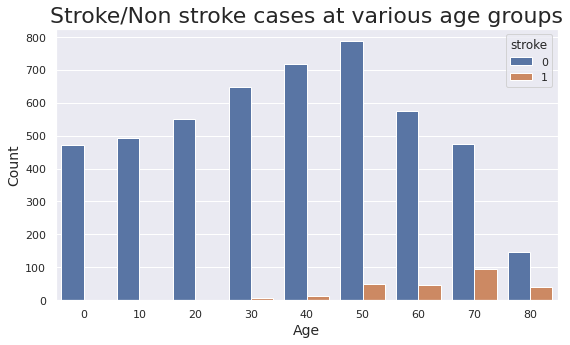

In [10]:
glucose_bins = np.linspace(0,280,29)
bmi_bins = np.linspace(0,100,51)
age_bins = np.linspace(0,90,10)
dataviz['binned_glucose'] = pd.cut(dataviz['avg_glucose_level'], glucose_bins, labels=glucose_bins[:-1],right=False)
dataviz['binned_bmi'] = pd.cut(dataviz['bmi'], bmi_bins, labels=bmi_bins[:-1],right=False)
dataviz['binned_age'] = pd.cut(dataviz['age'], age_bins, labels=age_bins[:-1],right=False)
dataviz['binned_glucose'] = dataviz['binned_glucose'].astype('int')
dataviz['binned_bmi'] = dataviz['binned_bmi'].astype('int')
dataviz['binned_age'] = dataviz['binned_age'].astype('int')
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_age',hue='stroke',data=dataviz)
ax.set_title('Stroke/Non stroke cases at various age groups').set_fontsize(22)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

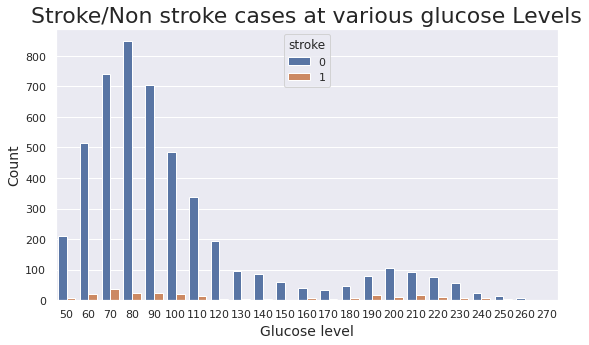

In [11]:
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_glucose',hue='stroke',data=dataviz)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('Glucose level',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

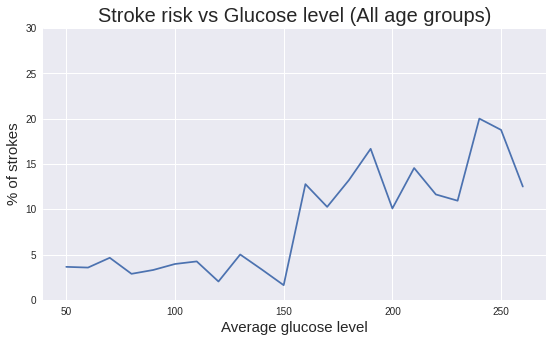

In [12]:
stroke_cases = Counter(dataviz['binned_glucose'][dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_glucose'])
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.ylim(0,30)
plt.title('Stroke risk vs Glucose level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Average glucose level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'b')

Text(0.5, 24.0, 'Average glucose level')

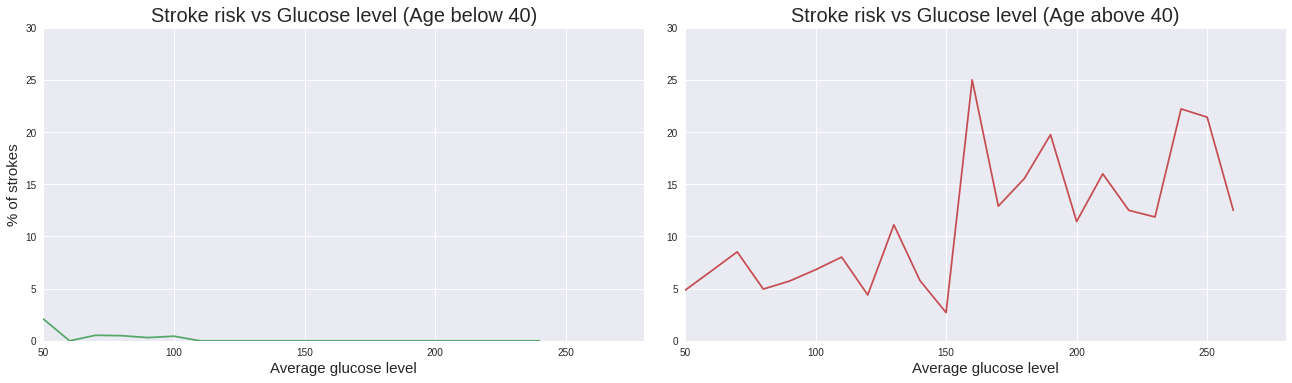

In [13]:
fix, ax = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
stroke_cases = Counter(dataviz['binned_glucose'][(dataviz['binned_age']<40) & (dataviz['stroke']==1)])
total_cases = Counter(dataviz['binned_glucose'][dataviz['binned_age']<40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[0].set_ylim(0,30)
ax[0].set_xlim(50,280)
ax[0].plot(labels[:-1],stroke_pct[:-1],'g')
ax[0].set_title('Stroke risk vs Glucose level (Age below 40)',fontsize=20)
ax[0].set_ylabel('% of strokes',fontsize=15)
ax[0].set_xlabel('Average glucose level',fontsize=15)

stroke_cases = Counter(dataviz['binned_glucose'][(dataviz['binned_age']>=40) & (dataviz['stroke']==1)])
total_cases = Counter(dataviz['binned_glucose'][dataviz['binned_age']>=40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[1].set_ylim(0,30)
ax[1].set_xlim(50,280)
ax[1].plot(labels[:-1],stroke_pct[:-1],'r')
ax[1].set_title('Stroke risk vs Glucose level (Age above 40)',fontsize=20)
#ax[1].set_ylabel('% of strokes',fontsize=15)
ax[1].set_xlabel('Average glucose level',fontsize=15)

Text(0.5, 24.0, 'Average glucose level')

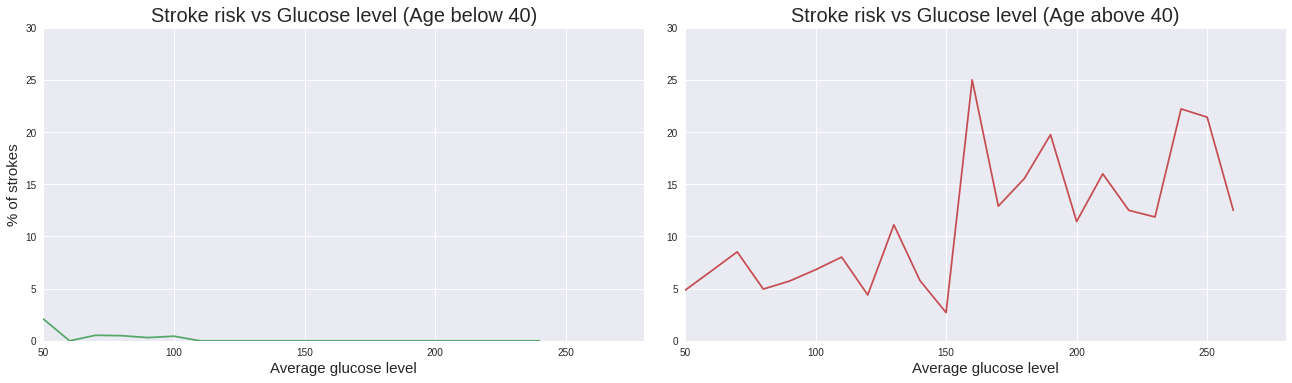

In [14]:
fix, ax = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
stroke_cases = Counter(dataviz['binned_glucose'][(dataviz['binned_age']<40) & (dataviz['stroke']==1)])
total_cases = Counter(dataviz['binned_glucose'][dataviz['binned_age']<40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[0].set_ylim(0,30)
ax[0].set_xlim(50,280)
ax[0].plot(labels[:-1],stroke_pct[:-1],'g')
ax[0].set_title('Stroke risk vs Glucose level (Age below 40)',fontsize=20)
ax[0].set_ylabel('% of strokes',fontsize=15)
ax[0].set_xlabel('Average glucose level',fontsize=15)

stroke_cases = Counter(dataviz['binned_glucose'][(dataviz['binned_age']>=40) & (dataviz['stroke']==1)])
total_cases = Counter(dataviz['binned_glucose'][dataviz['binned_age']>=40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[1].set_ylim(0,30)
ax[1].set_xlim(50,280)
ax[1].plot(labels[:-1],stroke_pct[:-1],'r')
ax[1].set_title('Stroke risk vs Glucose level (Age above 40)',fontsize=20)
#ax[1].set_ylabel('% of strokes',fontsize=15)
ax[1].set_xlabel('Average glucose level',fontsize=15)

In [15]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['hypertension'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['hypertension'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=['No','Yes'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=['No','Yes'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Hypertension','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Hypertension",
    font=dict(size=18)
)

fig.show()

In [16]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['heart_disease'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['heart_disease'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=['No','Yes'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=['No','Yes'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Heart Disease','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Heart Disease",
    font=dict(size=18)
)

fig.show()

In [17]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['smoking_status'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['smoking_status'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Smoking Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Smoking Status",
    font=dict(size=18)
)

fig.show()

In [18]:
counts0 = Counter(dataviz[dataviz['stroke']==0]['gender'])
counts1 = Counter(dataviz[dataviz['stroke']==1]['gender'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Gender','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Gender",
    font=dict(size=18)
)

fig.show()

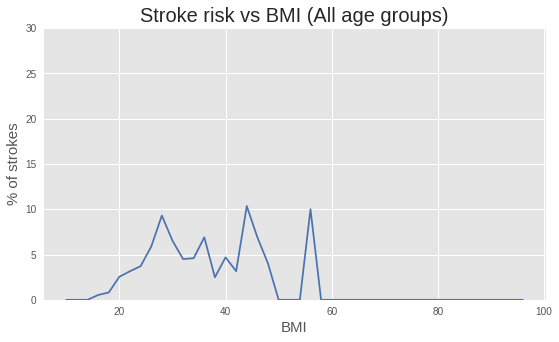

In [19]:
stroke_cases = Counter(dataviz['binned_bmi'][dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_bmi'])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('ggplot')
plt.figure(figsize=(9,5))
plt.ylim(0,30)
plt.title('Stroke risk vs BMI (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('BMI',fontsize=15)
plt.plot(labels,stroke_pct,'b')

Text(0, 0.5, 'No. of risk factors')

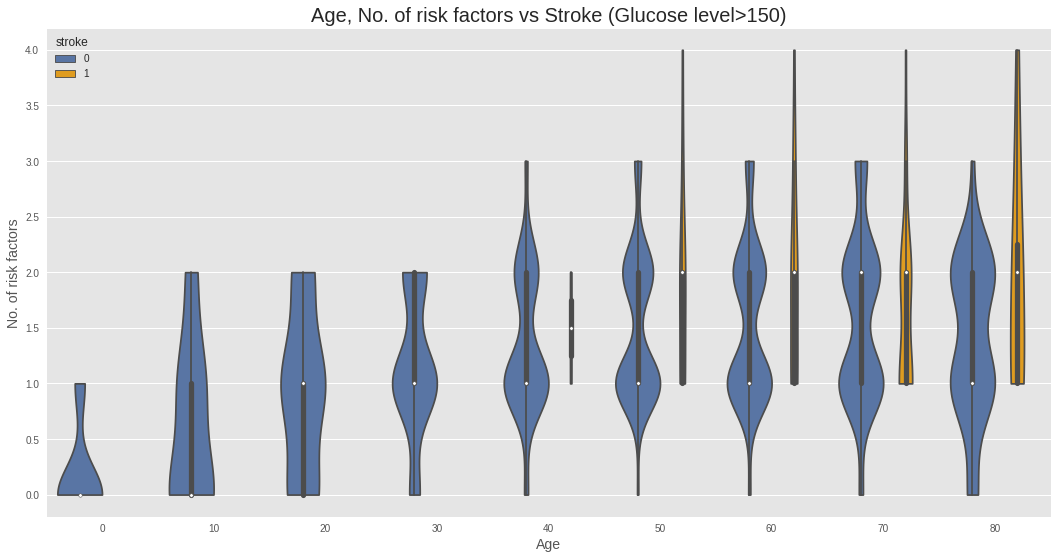

In [20]:
dataviz['smokes'] = np.nan
dataviz['smokes'][dataviz['smoking_status']=='smokes'] = 1
dataviz['smokes'][dataviz['smoking_status']!='smokes'] = 0
dataviz['smokes'] = dataviz['smokes'].astype('int')
dataviz['high_bmi']=np.nan
dataviz['high_bmi'][dataviz['bmi']>=25] = 1
dataviz['high_bmi'][dataviz['bmi']<25] = 0
dataviz['no_of_risk_factors'] = dataviz['hypertension']+dataviz['heart_disease']+dataviz['smokes']+dataviz['high_bmi']
plt.figure(figsize=(18,9))
ax = sns.violinplot(x='binned_age',y='no_of_risk_factors',hue='stroke',data=dataviz[dataviz['binned_glucose']>150],scale='count',palette={0: "b", 1: "orange"},cut=0)
ax.set_title('Age, No. of risk factors vs Stroke (Glucose level>150)',fontsize=20)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('No. of risk factors',fontsize=14)

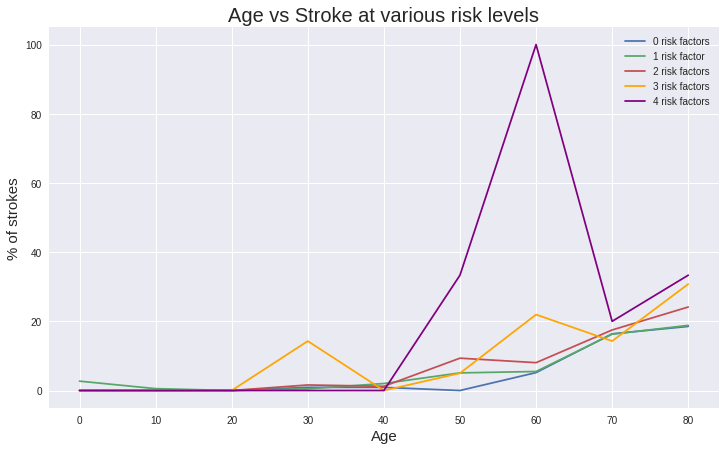

In [21]:

stroke_cases = Counter(dataviz['binned_age'][(dataviz['no_of_risk_factors']==0) & dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_age'][dataviz['no_of_risk_factors']==0])
all_cases = total_cases
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
plt.figure(figsize=(12,7))
plt.title('Age vs Stroke at various risk levels',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.plot(labels,stroke_pct,'b',label='0 risk factors')

#risk 1
stroke_cases = Counter(dataviz['binned_age'][(dataviz['no_of_risk_factors']==1) & dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_age'][dataviz['no_of_risk_factors']==1])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
plt.plot(labels,stroke_pct,'g',label='1 risk factor')

#risk 2
stroke_cases = Counter(dataviz['binned_age'][(dataviz['no_of_risk_factors']==2) & dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_age'][dataviz['no_of_risk_factors']==2])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
plt.plot(labels,stroke_pct,'r',label='2 risk factors')

#risk 3
stroke_cases = Counter(dataviz['binned_age'][(dataviz['no_of_risk_factors']==3) & dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_age'][dataviz['no_of_risk_factors']==3])
y=sorted(total_cases.items())
[y.append((item[0],np.inf)) for item in sorted(all_cases.items()) if item[0] not in [item2[0] for item2 in sorted(total_cases.items())]]
z = sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(y) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(y)])
plt.plot(labels,stroke_pct,'orange',label='3 risk factors')

#risk 4
stroke_cases = Counter(dataviz['binned_age'][(dataviz['no_of_risk_factors']==4) & dataviz['stroke']==1])
total_cases = Counter(dataviz['binned_age'][dataviz['no_of_risk_factors']==4])
y=sorted(total_cases.items())
[y.append((item[0],np.inf)) for item in sorted(all_cases.items()) if item[0] not in [item2[0] for item2 in sorted(total_cases.items())]]
z = sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(y) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(y)])
plt.plot(labels,stroke_pct,'purple',label='4 risk factors')
plt.legend()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [23]:
fig = px.pie(df['stroke'], values=[item[1] for item in Counter(df['stroke']).items()], names=['Stroke Positive','Stroke Negative'], title='Strokes and Non stroke cases')
fig.show()

In [24]:
X = df.drop(['id','stroke'],axis=1)
Y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)
bmi_mode = X_train['bmi'].mode()
X_train['bmi'].fillna(bmi_mode[0],inplace=True)
X_test['bmi'].fillna(bmi_mode[0],inplace=True)

In [25]:
X = df.drop(['id','stroke'],axis=1)
Y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)
bmi_mode = X_train['bmi'].mode()
X_train['bmi'].fillna(bmi_mode[0],inplace=True)
X_test['bmi'].fillna(bmi_mode[0],inplace=True)

In [26]:
def add_additional_cols(df):
    df['smokes'] = np.nan
    df['smokes'][df['smoking_status']=='smokes'] = 1
    df['smokes'][df['smoking_status']!='smokes'] = 0
    df['smokes'] = df['smokes'].astype('int')

    df['high_bmi']=np.nan
    df['high_bmi'][df['bmi']>=25] = 1
    df['high_bmi'][df['bmi']<25] = 0
    
    df['no_of_risk_factors'] = df['hypertension']+df['heart_disease']+df['smokes']+df['high_bmi']
    df['attrib1'] = df['avg_glucose_level'] * (1 + df['no_of_risk_factors'])
add_additional_cols(X_train)
add_additional_cols(X_test)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_bl, Y_train_bl = oversampler.fit_resample(X_train,Y_train)
num_attribs = ['age','hypertension','heart_disease','avg_glucose_level','bmi','no_of_risk_factors','attrib1']
cat_attribs = ['gender','ever_married','work_type','Residence_type','smoking_status']
num_pipeline = Pipeline([
    ('scaler',StandardScaler())
])
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_attribs)
])

X_train_prepared = full_pipeline.fit_transform(X_train_bl)
X_test_prepared = full_pipeline.transform(X_test)

<AxesSubplot:>

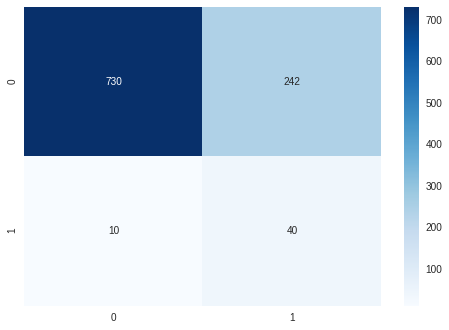

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, Y_train_bl)
Y_pred = log_reg.predict(X_test_prepared)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='d',cmap='Blues')

In [28]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022



<AxesSubplot:>

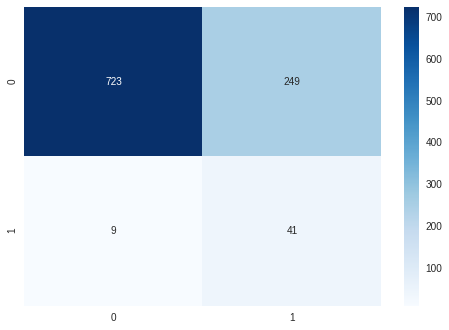

In [29]:
lin_svc = LinearSVC()
lin_svc.fit(X_train_prepared, Y_train_bl)
Y_pred = lin_svc.predict(X_test_prepared)
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot=True,fmt='d',cmap='Blues')

In [30]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.82      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.54      1022
weighted avg       0.95      0.75      0.82      1022



In [31]:
num_attribs = ['age']
num_pipeline = Pipeline([
    ('scaler',StandardScaler())
])
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train_bl)
X_test_prepared = full_pipeline.transform(X_test)
lin_svc = LinearSVC()
lin_svc.fit(X_train_prepared, Y_train_bl)
Y_pred = lin_svc.predict(X_test_prepared)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.84      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.73      0.80      1022

